In [7]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Common imports
import numpy as np
import os
from urllib.parse import urlparse

# ML flow imports
import mlflow
import mlflow.sklearn

import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

In [5]:
!pip install mlflow

  Using cached mlflow-2.1.1-py3-none-any.whl (16.7 MB)
  Using cached Markdown-3.4.1-py3-none-any.whl (93 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
     ---------------------------------------- 0.0/435.6 kB ? eta -:--:--
     ------- ------------------------------- 81.9/435.6 kB 2.3 MB/s eta 0:00:01
     ------------ ------------------------- 143.4/435.6 kB 2.1 MB/s eta 0:00:01
     ------------ ------------------------- 143.4/435.6 kB 2.1 MB/s eta 0:00:01
     ---------------------------- --------- 327.7/435.6 kB 1.8 MB/s eta 0:00:01
     ----------------------------------- -- 409.6/435.6 kB 2.0 MB/s eta 0:00:01
     -------------------------------------  430.1/435.6 kB 1.9 MB/s eta 0:00:01
     -------------------------------------  430.1/435.6 kB 1.9 MB/s eta 0:00:01
     -------------------------------------  430.1/435.6 kB 1.9 MB/s eta 0:00:01
     -------------------------------------  430.1/435.6 kB 1.9 MB/s eta 0:00:01
     ----------------------


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
from sklearn.metrics._plot.precision_recall_curve import precision_recall_curve
from sklearn.metrics import auc
def eval_metrics(actual, pred):
    prec, recall,_ = precision_recall_curve(actual, pred)
    aucpr = auc(recall, prec)
    return aucpr

### Loading the train, test, validation data:

In [9]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
valid_data = pd.read_csv('validation.csv')

### Postprocessing data for transforming message to vector

In [10]:
spam_words = {}
ham_words = {}
s_c = 0
h_c = 0
i = 0
for line in list(train_data.message):
    if list(train_data.label)[i] == "spam":
        s_c += 1
        s_w = line.split(" ")
        for word in s_w:
            if word.lower() in spam_words.keys():
                spam_words[word.lower()] += 1
            else:
                spam_words[word.lower()] = 1
    else:
        h_c += 1
        h_w = line.split(" ")
        for word in h_w:
            if word.lower() in ham_words.keys():
                ham_words[word.lower()] += 1
            else:
                ham_words[word.lower()] = 1
    i += 1

In [11]:
print(len(spam_words.keys()))

3226


In [12]:
print(h_c,s_c)

3471 555


In [13]:
ham_words["week"]

27

In [14]:
spam_words_sorted = sorted(spam_words.items(), key=lambda x:x[1])
spam_words_sorted[0][0]

'09066358361'

In [15]:
top_300_spam_words = list(spam_words_sorted[i][0] for i in range(-300,0))
print(top_300_spam_words)

['need', 'stop?', 'got', 'sexy', 'wk', 'rental', 'tomorrow', 'n', 'calls', 'over', 'auction', '0800', 'currently', 'games', 'charity', 'phones', 'yes', 'word:', 'unlimited', 'then', 're', 'camcorder', 'specially', 'end', 'representative', 'between', 'someone', 'ntt', 'real', 'xmas', 'why', 'club', 'name', 'urgent', 'admirer', 'looking', 'u-find', 'r*reveal', 'special-call', '18+', 'when', 'hi', 'x', 'congratulations', 'cs', 'prize.', 'txts', 'player', 'mobiles', 'no.', 'collection.', 'wanna', 'apply.', 'direct', 'winner', 'speak', 'ts&cs', 'xxx', 'national', 'either', '800', 'un-redeemed', 'sae', 'dogging', 't&c', 'mobile!', 'voucher', 'my', 'hmv', 'txt:', 'great', 'take', 'good', 'final', 'award.', 'â£350', 'am', 'week!', 'trying', 'u.', 'todays', 'line.', 'had', 'opt', 'award', 'thanks', 'charged', '.', 'waiting', '2003', 'sex', 'await', 'join', 'stop.', 'secret', 'make', 'thinks', 'wkly', 'offers', 't', 'texts', 'min', 'sms', 'prize!', 'services', 'â£250', 'word', 'top', 'rate', 'co

In [16]:
ham_words_sorted = sorted(ham_words.items(), key=lambda x:x[1])
ham_words_sorted[0][0]

'lul'

In [17]:
top_200_ham_words = list(ham_words_sorted[i][0] for i in range(-200,0))
print(top_200_ham_words)

['us', 'lor...', 'sorry,', 'even', 'which', 'sure', 'never', 'before', 'ãœ', 'find', 'tomorrow', 'dun', 'went', "that's", 'something', 'also', '!', 'wait', "you're", 'it.', 'why', 'our', 'buy', 'many', 'could', 'were', 'feel', 'c', 'right', 'cant', 'told', 'always', 'wat', 'his', "i've", 'sent', 'lor.', 'anything', 'keep', 'b', "can't", 'gud', 'gonna', 'dear', 'today', 'yeah', 'would', 'please', 'pick', ':)', 'let', 'who', 'said', 'lol', 'text', 'now.', 'work', 'e', 'phone', 'doing', 'miss', 'im', 'last', 'say', 'them', 'too', 'oh', 'meet', 'hey', 'da', 'you.', 'well', 'here', 'very', 'really', '&amp;', 'had', 'great', 'new', 'more', 'been', 'way', 'after', 'night', 'ask', 'later', 'him', 'an', 'her', 'give', 'cos', 'pls', 'sorry', 'make', 'd', 'should', 'has', 'where', 'me.', "it's", 'happy', 'much', 'hope', 'hi', 'back', 'they', 'take', 'some', 'ã¼', 'day', 'only', 'home', 'there', 'she', 'any', 'did', 'dont', 'n', 'send', 'tell', 'see', 'think', 'by', 'r', "don't", 'still', 'one', '

In [18]:
true_spam_words = []
for i in top_300_spam_words:
    if i in ham_words.keys():
        if ham_words[i] <= h_c/100: #i.e., these spam words appeared very fewer times in ham messages.
            true_spam_words.append(i)
    else:
        true_spam_words.append(i)
print(true_spam_words,len(true_spam_words))

['stop?', 'sexy', 'wk', 'rental', 'calls', 'over', 'auction', '0800', 'currently', 'games', 'charity', 'phones', 'yes', 'word:', 'unlimited', 're', 'camcorder', 'specially', 'end', 'representative', 'between', 'someone', 'ntt', 'real', 'xmas', 'club', 'name', 'urgent', 'admirer', 'looking', 'u-find', 'r*reveal', 'special-call', '18+', 'x', 'congratulations', 'cs', 'prize.', 'txts', 'player', 'mobiles', 'no.', 'collection.', 'wanna', 'apply.', 'direct', 'winner', 'speak', 'ts&cs', 'xxx', 'national', 'either', '800', 'un-redeemed', 'sae', 'dogging', 't&c', 'mobile!', 'voucher', 'hmv', 'txt:', 'final', 'award.', 'â£350', 'week!', 'trying', 'u.', 'todays', 'line.', 'opt', 'award', 'thanks', 'charged', 'waiting', '2003', 'sex', 'await', 'join', 'stop.', 'secret', 'thinks', 'wkly', 'offers', 't', 'texts', 'min', 'sms', 'prize!', 'services', 'â£250', 'word', 'top', 'rate', 'code:', '100', 'music', '87066', 'code', 'poly', 'land', '12hrs', 'offer', 'tried', 'operator', 'â£5000', 'anytime', 't&

So, 90 words were some common words in English which appear frequently in any kind of messages.

In [19]:
spam_dict = {spam_w: true_spam_words.index(spam_w) for spam_w in true_spam_words}
print(spam_dict)

{'stop?': 0, 'sexy': 1, 'wk': 2, 'rental': 3, 'calls': 4, 'over': 5, 'auction': 6, '0800': 7, 'currently': 8, 'games': 9, 'charity': 10, 'phones': 11, 'yes': 12, 'word:': 13, 'unlimited': 14, 're': 15, 'camcorder': 16, 'specially': 17, 'end': 18, 'representative': 19, 'between': 20, 'someone': 21, 'ntt': 22, 'real': 23, 'xmas': 24, 'club': 25, 'name': 26, 'urgent': 27, 'admirer': 28, 'looking': 29, 'u-find': 30, 'r*reveal': 31, 'special-call': 32, '18+': 33, 'x': 34, 'congratulations': 35, 'cs': 36, 'prize.': 37, 'txts': 38, 'player': 39, 'mobiles': 40, 'no.': 41, 'collection.': 42, 'wanna': 43, 'apply.': 44, 'direct': 45, 'winner': 46, 'speak': 47, 'ts&cs': 48, 'xxx': 49, 'national': 50, 'either': 51, '800': 52, 'un-redeemed': 53, 'sae': 54, 'dogging': 55, 't&c': 56, 'mobile!': 57, 'voucher': 58, 'hmv': 59, 'txt:': 60, 'final': 61, 'award.': 62, 'â£350': 63, 'week!': 64, 'trying': 65, 'u.': 66, 'todays': 67, 'line.': 68, 'opt': 69, 'award': 70, 'thanks': 71, 'charged': 72, 'waiting': 

### Message to vector transformation:

Defining function to convert every messages to some vectors to make our training dataset to be fitted to ML models

In [27]:
def messtovec(message):
    data = [0 for i in range(211)] #for 210 spam words, length of message
    content = message.split(" ")
    for i in content:
        if i.lower() in spam_dict.keys():
            data[spam_dict[i.lower()]] = 1
    data[-1] = len(content)
    return data

In [28]:
def data_prep(data):
    column_names = [i for i in true_spam_words] + ["length"]
    Full_data = []
    i = 0
    index_names = []
    for line in list(data.message):
        i += 1
        index_names.append(i)
        d = messtovec(line)
        Full_data.append(d)
    return Full_data,index_names,column_names

tr_d,tr_i,tr_c = data_prep(train_data)
train_X = pd.DataFrame(data = tr_d, 
                  index = tr_i, 
                  columns = tr_c)

va_d,va_i,va_c = data_prep(valid_data)
valid_X = pd.DataFrame(data = va_d, 
                  index = va_i, 
                  columns = va_c)

te_d,te_i,te_c = data_prep(test_data)
test_X = pd.DataFrame(data = te_d, 
                  index = te_i, 
                  columns = te_c)

In [29]:
train_Y = pd.DataFrame(data = list(train_data.label), 
                  index = [i+1 for i in range(len(list(train_data.label)))],
                  columns = ["label"])

test_Y = pd.DataFrame(data = list(test_data.label), 
                  index = [i+1 for i in range(len(list(test_data.label)))],
                  columns = ["label"])

valid_Y = pd.DataFrame(data = list(valid_data.label), 
                  index = [i+1 for i in range(len(list(valid_data.label)))],
                  columns = ["label"])

In [30]:
train_Y['label'] = train_Y['label'].replace(['spam'], 1)
train_Y['label'] = train_Y['label'].replace(['ham'], 0)

test_Y['label'] = test_Y['label'].replace(['spam'], 1)
test_Y['label'] = test_Y['label'].replace(['ham'], 0)

valid_Y['label'] = valid_Y['label'].replace(['spam'], 1)
valid_Y['label'] = valid_Y['label'].replace(['ham'], 0)

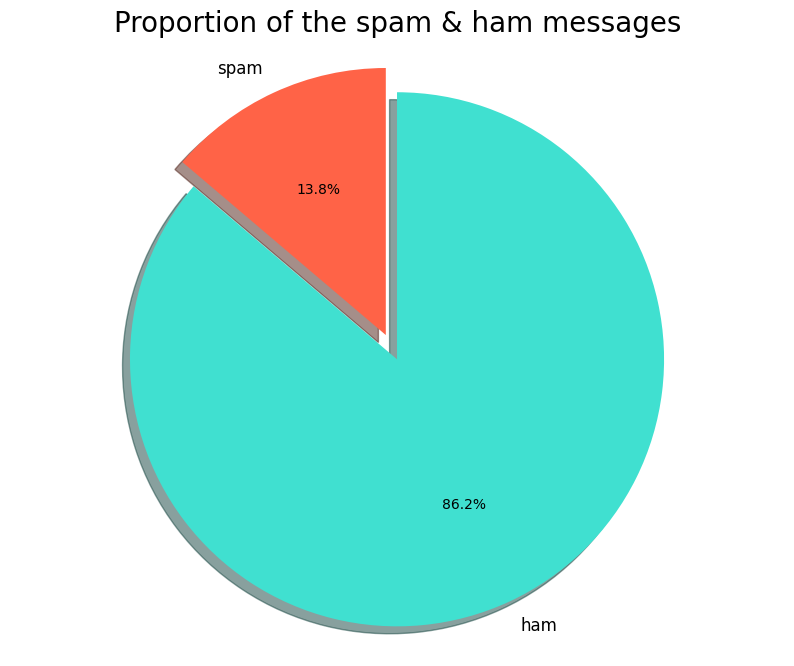

In [31]:
#Pie-Chart of output variable
labels = 'spam', 'ham'
sizes = [train_Y.label[train_Y['label']==1].count(), train_Y.label[train_Y['label']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors =["tomato","turquoise"] )
ax1.axis('equal')
plt.title("Proportion of the spam & ham messages", size = 20)
plt.show()

So, this is a very unbalanced dataset

# Random Forest Classifier:

In [68]:
from sklearn.ensemble import RandomForestClassifier
#for computing Mean Absolute Error
from sklearn.metrics import mean_absolute_error
def score_dataset(X_train, X_valid, y_train, y_valid,i,n):
    model = RandomForestClassifier(n_estimators = n, max_depth = i, random_state = 42, class_weight = {0:13,1:87})
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [69]:
MAE = 1
for i in range(1,30):
    print("MAE:",score_dataset(train_X, valid_X, np.ravel(train_Y), np.ravel(valid_Y),i,100),"max_depth =",i)
    temp = score_dataset(train_X, valid_X, np.ravel(train_Y), np.ravel(valid_Y),i,100) 
    if MAE > temp:
        MAE = temp
        max_depth = i

MAE: 0.24331926863572434 max_depth = 1
MAE: 0.05063291139240506 max_depth = 2
MAE: 0.04219409282700422 max_depth = 3
MAE: 0.04219409282700422 max_depth = 4
MAE: 0.040787623066104076 max_depth = 5
MAE: 0.04360056258790436 max_depth = 6
MAE: 0.04360056258790436 max_depth = 7
MAE: 0.04360056258790436 max_depth = 8
MAE: 0.04219409282700422 max_depth = 9
MAE: 0.04360056258790436 max_depth = 10
MAE: 0.04219409282700422 max_depth = 11
MAE: 0.04219409282700422 max_depth = 12
MAE: 0.03938115330520394 max_depth = 13
MAE: 0.0379746835443038 max_depth = 14
MAE: 0.035161744022503515 max_depth = 15
MAE: 0.03656821378340366 max_depth = 16
MAE: 0.0379746835443038 max_depth = 17
MAE: 0.035161744022503515 max_depth = 18
MAE: 0.035161744022503515 max_depth = 19
MAE: 0.03375527426160337 max_depth = 20
MAE: 0.030942334739803096 max_depth = 21
MAE: 0.02531645569620253 max_depth = 22
MAE: 0.030942334739803096 max_depth = 23
MAE: 0.02531645569620253 max_depth = 24
MAE: 0.029535864978902954 max_depth = 25
MAE:

In [70]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = max_depth, class_weight = {0:13,1:87})
rf.fit(train_X,np.ravel(train_Y))

RandomForestClassifier(class_weight={0: 13, 1: 87}, max_depth=22,
                       random_state=42)

In [71]:
#memory used in fitting the Train data to the model
%load_ext memory_profiler
from memory_profiler import profile

%memit rf.fit(train_X,np.ravel(train_Y))

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 283.87 MiB, increment: 2.01 MiB


In [72]:
pred_Y = rf.predict(test_X)

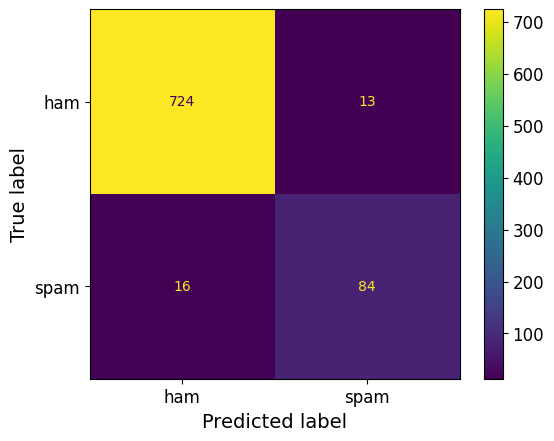

In [73]:
#confusion matrix for Decision Tree

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

f = open("random_forest.txt", "w")

accuracy_score = metrics.accuracy_score(test_Y, pred_Y)

con_matrix = confusion_matrix(test_Y,pred_Y, labels=[0,1])

report_matrix = classification_report(test_Y, pred_Y,labels=[0,1])

L = [str(accuracy_score),"\n\n",str(con_matrix),'\n\n', str(report_matrix)] 
f.writelines(L) 
f.close()

from sklearn.metrics import ConfusionMatrixDisplay
fig = plt.figure()
Disp =ConfusionMatrixDisplay(con_matrix,display_labels=['ham','spam'])
Disp.plot()
plt.savefig("random_forest_confusion_matrix")
plt.close(fig)

In [74]:
print(report_matrix)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       737
           1       0.87      0.84      0.85       100

    accuracy                           0.97       837
   macro avg       0.92      0.91      0.92       837
weighted avg       0.96      0.97      0.97       837



In [75]:
with mlflow.start_run():
    Model = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = max_depth, class_weight = {0:13,1:87})
    Model.fit(train_X,np.ravel(train_Y))

    predicted_qualities = Model.predict(test_X)

    aucpr = eval_metrics(test_Y, predicted_qualities)

    print("Random Forest Classifier model (Area under Precision_Recall Curve={:f}):".format(aucpr))

    mlflow.log_param("Area under Precision Recall Curve", aucpr)


    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

    # Model regi
    if tracking_url_type_store != "file":
        mlflow.sklearn.log_model(Model, "model", registered_model_name="Random Forest Classifier")
    else:
        mlflow.sklearn.log_model(Model, "model")

Random Forest Classifier model (Area under Precision_Recall Curve=0.862548):


# Naive Bayes Classifier:

In [44]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.metrics import mean_absolute_error
def score_dataset(X_train, X_valid, y_train, y_valid, nb):
    model = nb
    model.fit(X_train, np.ravel(y_train))
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
# instantiate the model
gnb = GaussianNB()
conb = ComplementNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
# canb = CategoricalNB()
nb = [gnb, conb, mnb, bnb]

MAE = 1
for i in nb:
    print("MAE:",score_dataset(train_X, valid_X, np.ravel(train_Y), np.ravel(valid_Y), i),"naive bayes' model =",i)
    temp = score_dataset(train_X, valid_X, np.ravel(train_Y), np.ravel(valid_Y), i) 
    if MAE > temp:
        MAE = temp
        nb_model = i

MAE: 0.030942334739803096 naive bayes' model = GaussianNB()
MAE: 0.03938115330520394 naive bayes' model = ComplementNB()
MAE: 0.026722925457102673 naive bayes' model = MultinomialNB()
MAE: 0.02531645569620253 naive bayes' model = BernoulliNB()


In [49]:
# fit the model
nb_model.fit(train_X, np.ravel(train_Y))

BernoulliNB()

In [52]:
#memory used in fitting the Train data to the model
%load_ext memory_profiler
from memory_profiler import profile
%memit bnb.fit(train_X,np.ravel(train_Y))

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 284.72 MiB, increment: 0.00 MiB


In [53]:
pred_Y = bnb.predict(test_X)

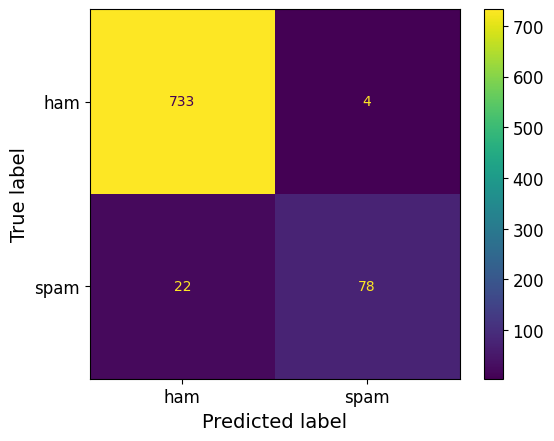

In [54]:
#confusion matrix for Decision Tree

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

f = open("Bayes'_tree.txt", "w")

accuracy_score = metrics.accuracy_score(test_Y, pred_Y)

con_matrix = confusion_matrix(test_Y,pred_Y, labels=[0,1])

report_matrix = classification_report(test_Y, pred_Y,labels=[0,1])

L = [str(accuracy_score),"\n\n",str(con_matrix),'\n\n', str(report_matrix)] 
f.writelines(L) 
f.close()

from sklearn.metrics import ConfusionMatrixDisplay

fig = plt.figure()
Disp =ConfusionMatrixDisplay(con_matrix,display_labels=['ham','spam'])
Disp.plot()
plt.savefig("Bayes'_confusion_matrix")
plt.close(fig)

In [55]:
print(report_matrix)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       737
           1       0.95      0.78      0.86       100

    accuracy                           0.97       837
   macro avg       0.96      0.89      0.92       837
weighted avg       0.97      0.97      0.97       837



In [58]:
with mlflow.start_run():
    Model = BernoulliNB()
    Model.fit(train_X,np.ravel(train_Y))

    predicted_qualities = Model.predict(test_X)

    aucpr = eval_metrics(test_Y, predicted_qualities)

    print("Naive Bayes Classifier model (Area under Precision_Recall Curve={:f}):".format(aucpr))

    mlflow.log_param("Area under Precision Recall Curve", aucpr)


    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

    # Model regi
    if tracking_url_type_store != "file":
        mlflow.sklearn.log_model(Model, "model", registered_model_name="Naive Bayes Classifier")
    else:
        mlflow.sklearn.log_model(Model, "model")

Naive Bayes Classifier model (Area under Precision_Recall Curve=0.878752):


# SVM Classifier:

In [59]:
# train a Support Vector Machine classifier on the training set
from sklearn.svm import SVC 
from sklearn.metrics import mean_absolute_error
def score_dataset(X_train, X_valid, y_train, y_valid, k):
    model = SVC(kernel=k) 
    model.fit(X_train, np.ravel(y_train))
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [60]:
MAE = 1
Kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in Kernels:
    print("MAE:",score_dataset(train_X, valid_X, np.ravel(train_Y), np.ravel(valid_Y),i),"kernel =",i)
    temp = score_dataset(train_X, valid_X, np.ravel(train_Y), np.ravel(valid_Y),i) 
    if MAE > temp:
        MAE = temp
        kernel = i

MAE: 0.01969057665260197 kernel = linear
MAE: 0.06188466947960619 kernel = poly
MAE: 0.0829817158931083 kernel = rbf
MAE: 0.2250351617440225 kernel = sigmoid


In [61]:
# instantiate the model
clf = SVC(kernel=kernel) 
# fit the model
clf.fit(train_X, np.ravel(train_Y))

SVC(kernel='linear')

In [62]:
#memory used in fitting the Train data to the model
%load_ext memory_profiler
from memory_profiler import profile
%memit clf.fit(train_X,np.ravel(train_Y))

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 299.23 MiB, increment: 15.27 MiB


In [63]:
pred_Y = clf.predict(test_X)

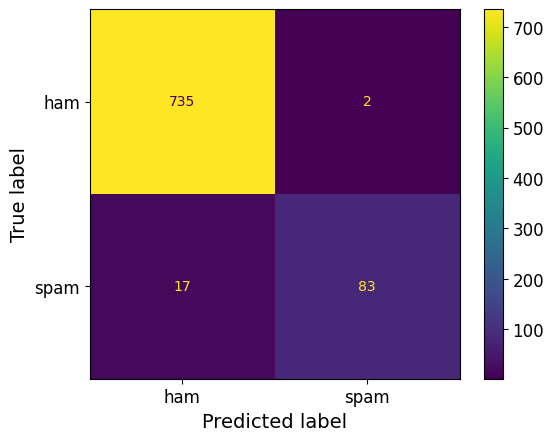

In [64]:
#confusion matrix for Decision Tree

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

f = open("SVM.txt", "w")

accuracy_score = metrics.accuracy_score(test_Y, pred_Y)

con_matrix = confusion_matrix(test_Y,pred_Y, labels=[0,1])

report_matrix = classification_report(test_Y, pred_Y,labels=[0,1])

L = [str(accuracy_score),"\n\n",str(con_matrix),'\n\n', str(report_matrix)] 
f.writelines(L) 
f.close()

from sklearn.metrics import ConfusionMatrixDisplay

fig = plt.figure()
Disp =ConfusionMatrixDisplay(con_matrix,display_labels=['ham','spam'])
Disp.plot()
plt.savefig("SVM_confusion_matrix")
plt.close(fig)

In [65]:
print(report_matrix)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       737
           1       0.98      0.83      0.90       100

    accuracy                           0.98       837
   macro avg       0.98      0.91      0.94       837
weighted avg       0.98      0.98      0.98       837



In [66]:
with mlflow.start_run():
    Model = SVC(kernel='linear')
    Model.fit(train_X,np.ravel(train_Y))

    predicted_qualities = Model.predict(test_X)

    aucpr = eval_metrics(test_Y, predicted_qualities)

    print("SVM Classifier model (Area under Precision_Recall Curve={:f}):".format(aucpr))

    mlflow.log_param("Area under Precision Recall Curve", aucpr)


    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

    # Model regi
    if tracking_url_type_store != "file":
        mlflow.sklearn.log_model(Model, "model", registered_model_name="SVM Classifier")
    else:
        mlflow.sklearn.log_model(Model, "model")

SVM Classifier model (Area under Precision_Recall Curve=0.913391):


Hence, we can observe that we are getting highest accuracy as 98% and largest area under Precision_Recall Curve for the model SVM classifier.
So we can choose SVM classifier as our best model.